# Generating datasets

In this section, we cover generation of data sets.

In [1]:
using CairoMakie
using AlgebraOfGraphics
using Random
using Distributions
using Chain
using DataFrames
using StatsFuns

## Classical linear model

Parameters.

In [2]:
n = 100
β₀ = 1
β₁ = 2
σ² = 10

10

Simulation.

In [3]:
x = rand(Normal(10, 3), n)
y = β₀ .+ β₁* x + rand(Normal(0, sqrt(σ²)), n)

100-element Vector{Float64}:
 26.41549425378133
 27.107336670278304
 30.18450044165117
  9.051381921065381
 23.512300432801847
 23.467919907027635
 32.62782173267533
 23.184209573356476
 39.486308483845704
 30.71242142153855
  ⋮
 28.09080167204552
  7.899151802996264
 21.450399347752445
 16.723063750524354
 16.768508496301408
 14.608426640451734
 19.923312955270184
 17.017973045324112
 15.778435376328833

Visualization.

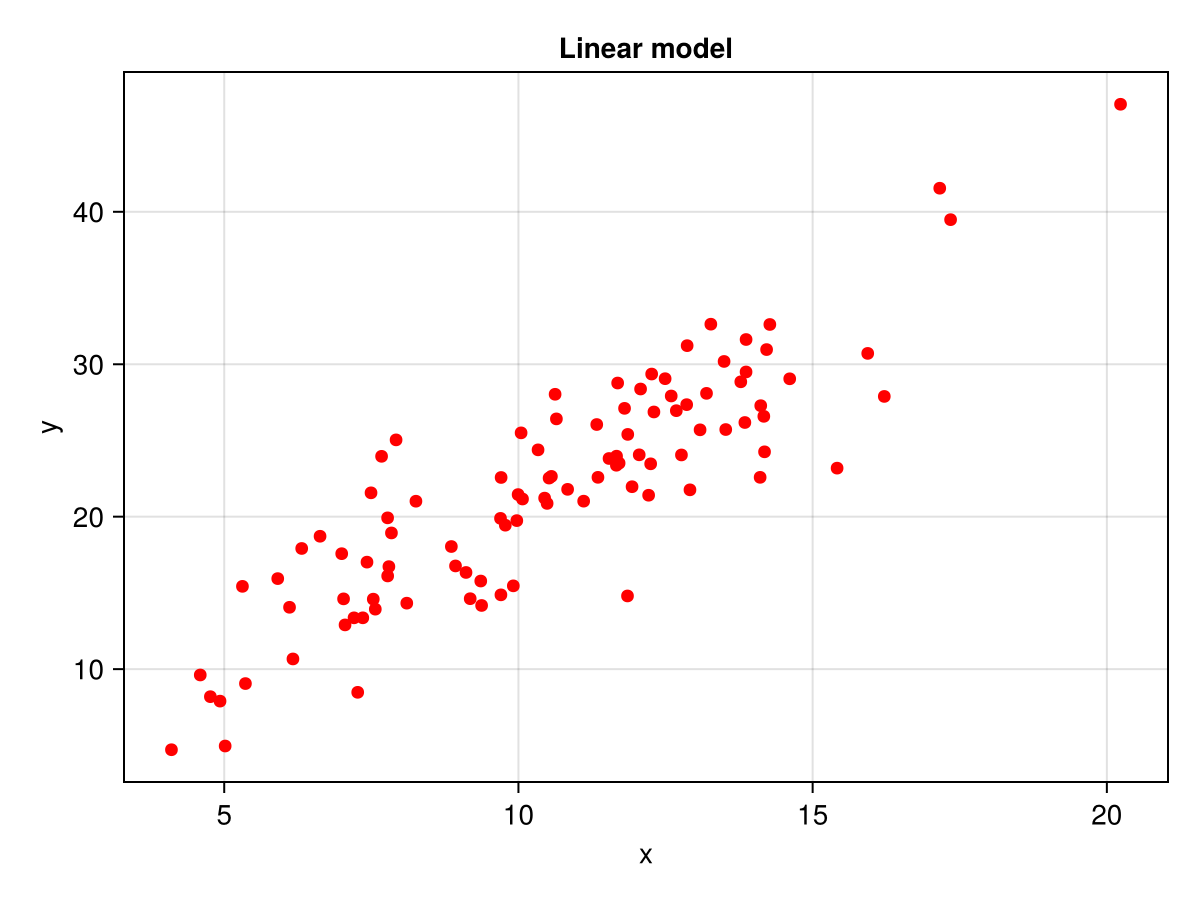

In [4]:
fig = scatter(x, y, color = :red,
    axis = (title = "Linear model", xlabel = "x", ylabel = "y")
)

## Linear model (GLM)

Parameters.

In [5]:
n = 100
β₀ = 10
β₁ = 3
β₂ = 2
σ² = 10

10

Simulation.

In [6]:
x1 = rand(Normal(), n)
x2 = rand(Exponential(), n)
μ = β₀ .+ β₁ * x1 + β₂ * x2
y = rand.(Normal.(μ, sqrt(σ²)))
df = DataFrame(x1 = x1, x2 = x2, μ = μ, y = y)

Row,x1,x2,μ,y
,Float64,Float64,Float64,Float64
1,0.832724,0.710965,13.9201,13.9916
2,0.228678,0.601733,11.8895,13.8375
3,-0.231592,2.03785,13.3809,21.0898
4,-0.561093,0.597424,9.51157,10.9046
5,-2.07994,3.17341,10.107,7.61299
6,-0.251577,0.476238,10.1977,10.9835
7,-0.117317,0.274924,10.1979,9.07258
8,0.893223,1.84851,16.3767,16.8443
9,1.04432,1.73228,16.5975,19.7741


Visualization.

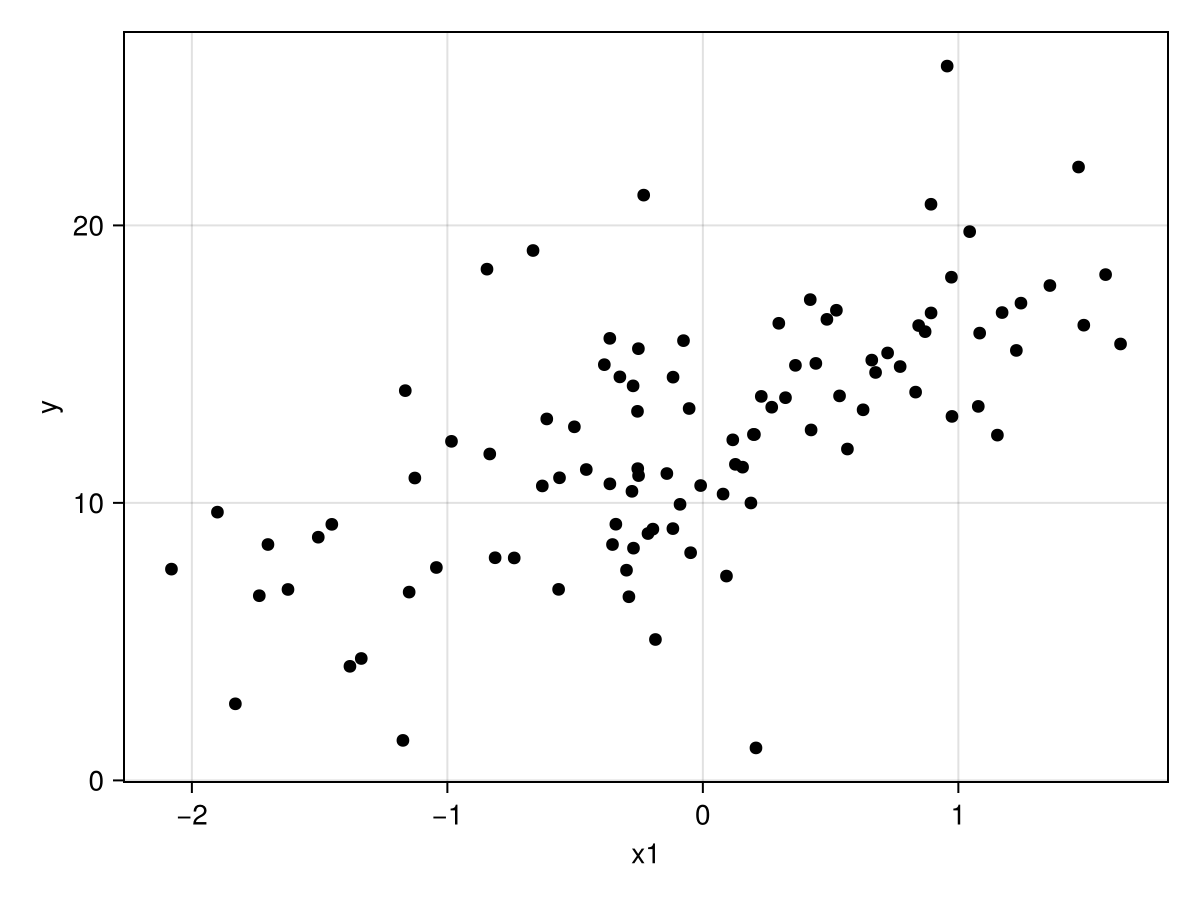

In [7]:
g = data(df) * mapping(:x1, :y)
fig = draw(g)

Let's plot more variables.

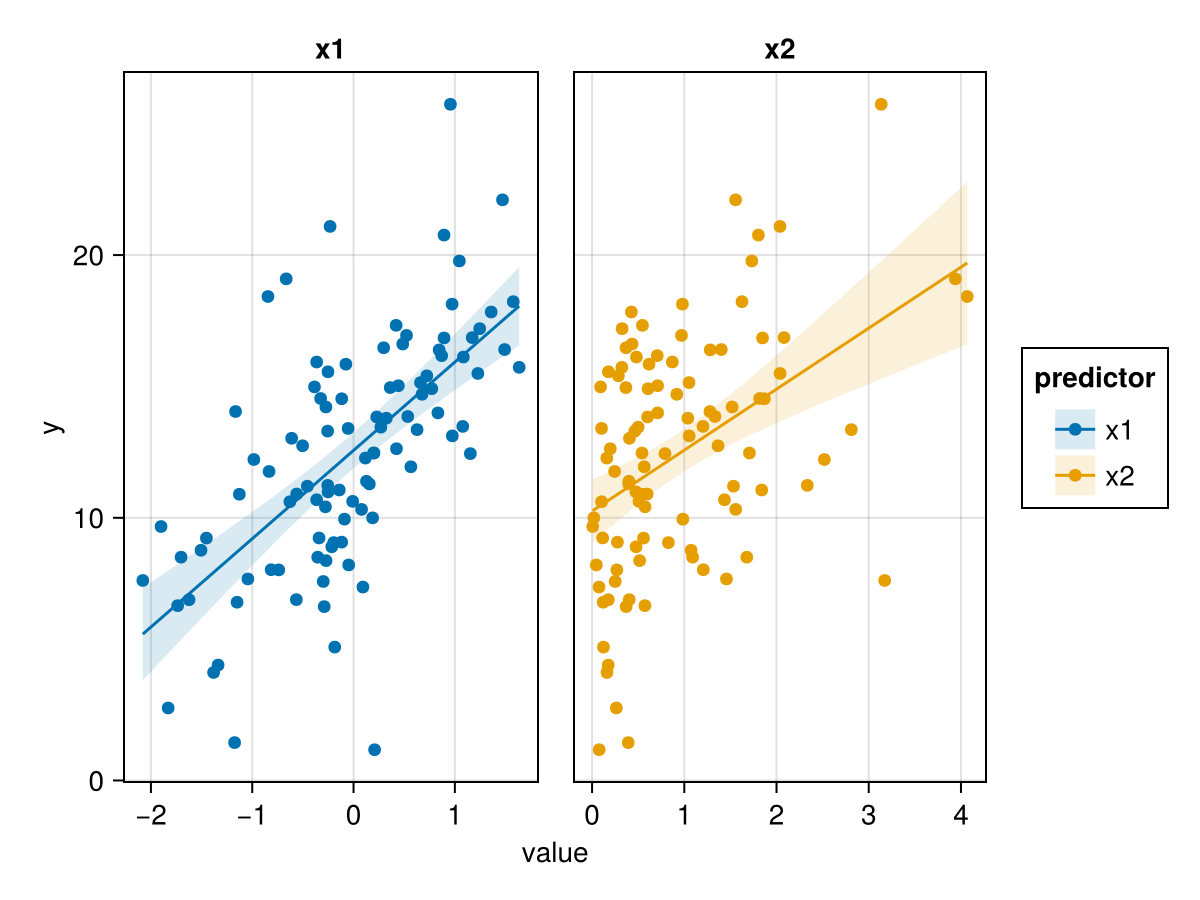

In [8]:
dfl = stack(df, [:x1, :x2], variable_name = :predictor)
layers = mapping() + linear()
g = data(dfl) * layers *  mapping(:value, :y, col = :predictor, color = :predictor)
fig = draw(g, facet = (; linkxaxes = :none))

## Bernoulli model

Define parameters.

In [9]:
n = 100
β₀ = 1
β₁ = 3

3

Simulate.

In [10]:
x = rand(Normal(), n)
p = logistic.(β₀ .+ β₁ * x)
y = rand.(Bernoulli.(p))
df = DataFrame(x = x, p = p, y = y)

Row,x,p,y
,Float64,Float64,Bool
1,1.64823,0.997387,true
2,1.08335,0.985937,true
3,2.09272,0.99931,true
4,-1.07595,0.097276,false
5,0.400262,0.90032,true
6,0.404637,0.901492,false
7,-0.441802,0.419359,false
8,0.546634,0.933386,true
9,-0.0247255,0.716227,true


Visualize.

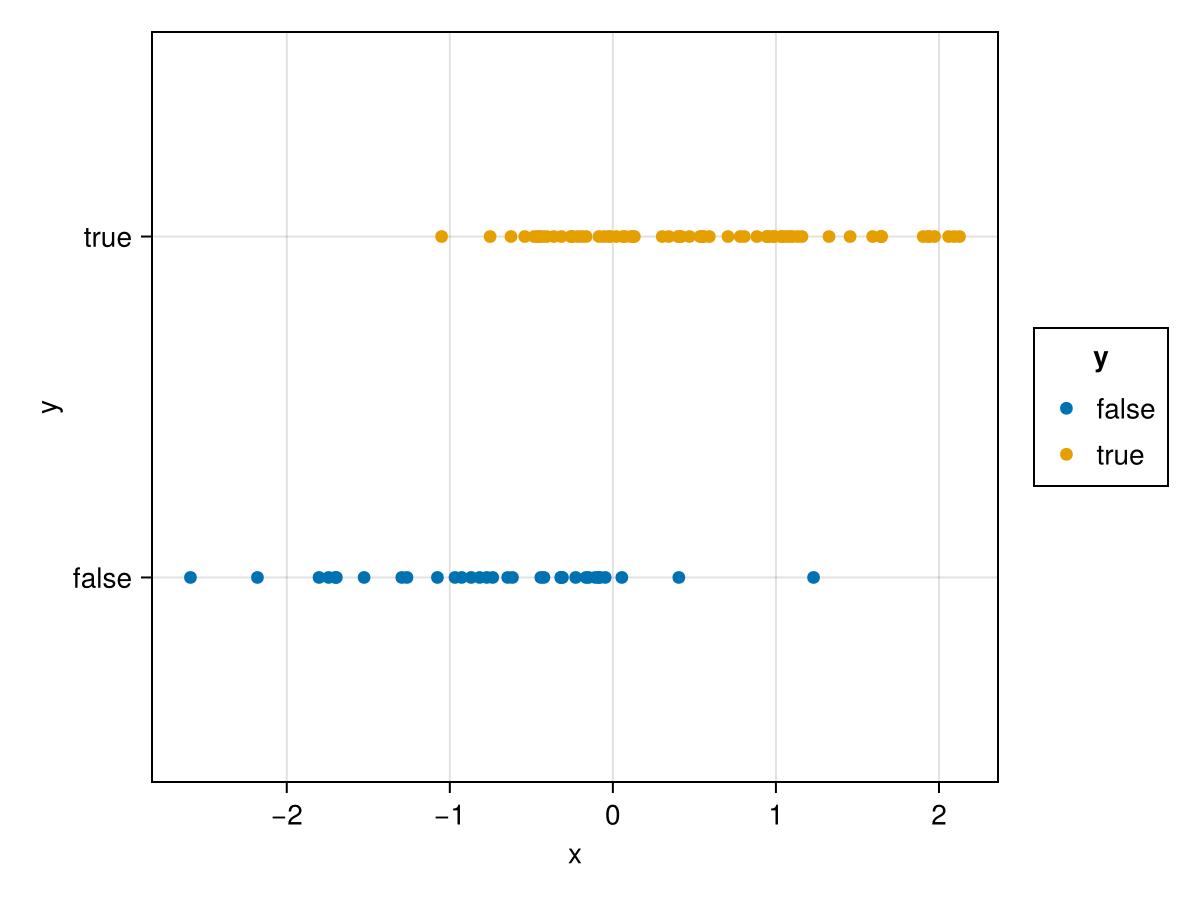

In [11]:
g = data(df) * mapping(:x, :y, color = :y)
fig = draw(g, facet = (; linkxaxes = :none))

## Poisson model

Define parameters.

In [12]:
n = 100
β₀ = 0.1
β₁ = 0.5

0.5

Simulate.

In [13]:
x = rand(Normal(), n)
lambda = exp.(β₀ .+ β₁ * x)
y = rand.(Poisson.(lambda))
df = DataFrame(x = x, lambda = lambda, y = y)

Row,x,lambda,y
,Float64,Float64,Int64
1,0.349909,1.31647,1
2,0.341358,1.31085,1
3,-0.713979,0.773376,1
4,1.21746,2.03141,3
5,-1.94786,0.417309,0
6,-1.13777,0.625699,0
7,-0.388321,0.910137,2
8,-1.27883,0.583089,1
9,-1.97653,0.411369,0


Visualize.

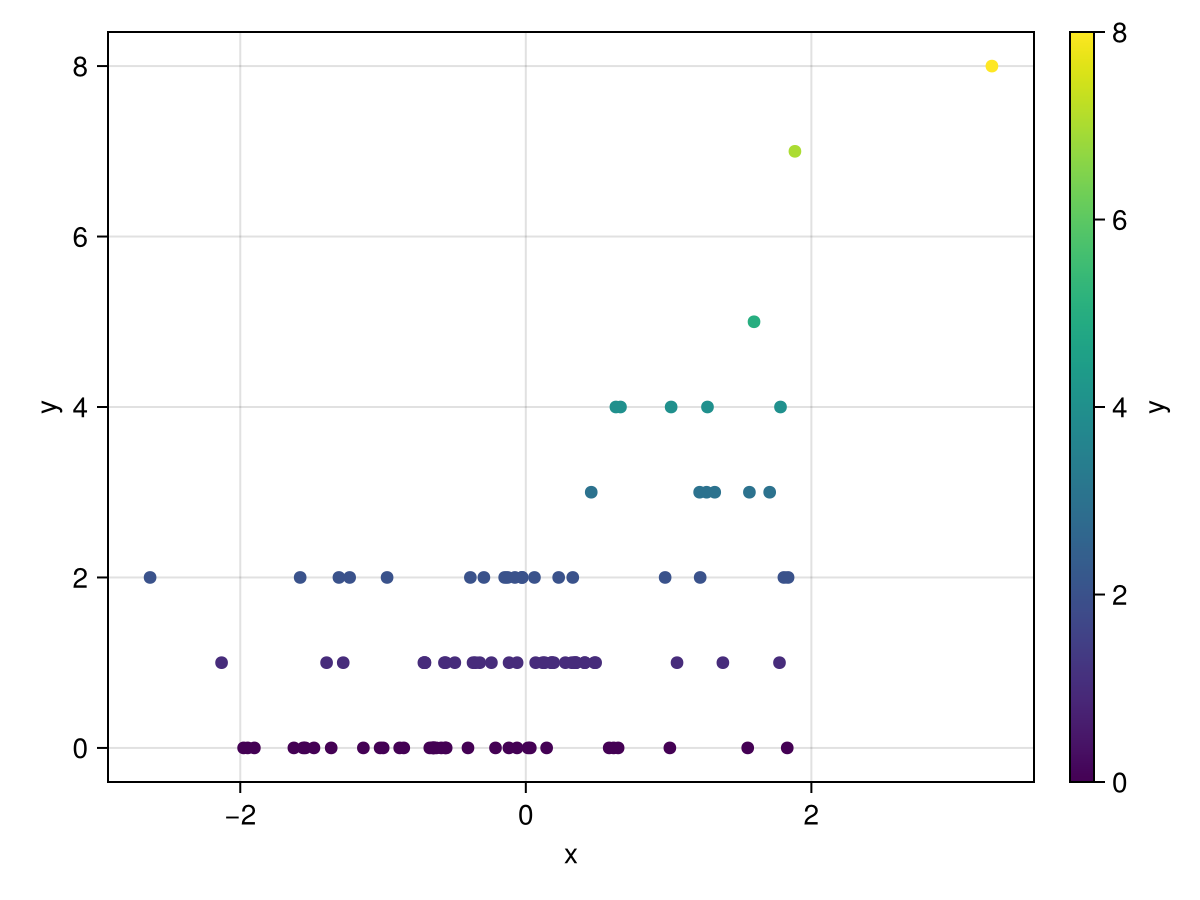

In [14]:
g = data(df) * mapping(:x, :y, color = :y)
fig = draw(g, facet = (; linkxaxes = :none))

## Linear model with dataframes (GLM)

Define parameters.

In [15]:
n = 100
β₀ = 10
β₁ = 3
σ² = 10

10

Simulate.

In [16]:
generate_y(x1, x2) = β₀ .+ β₁ * x1 + 2 * x2
df = @chain begin
    DataFrame(x1 = rand(Normal(), n), x2 = rand(Exponential(), n))
    transform!([:x1, :x2] => generate_y => :μ)
    transform!(:μ => (x -> rand.(Normal.(x, sqrt(σ²)))) => :y)
end

Row,x1,x2,μ,y
,Float64,Float64,Float64,Float64
1,0.132206,1.48594,13.3685,18.5875
2,0.632197,0.976057,13.8487,20.4222
3,2.43212,0.0749789,17.4463,8.03134
4,0.494628,0.538714,12.5613,14.9646
5,-1.06372,0.308035,7.42492,3.64143
6,0.934517,0.201162,13.2059,10.8838
7,-1.72862,1.30848,7.43108,8.80139
8,-0.286061,0.569215,10.2802,6.80321
9,-0.27262,0.0680103,9.31816,7.57768


Visualize.

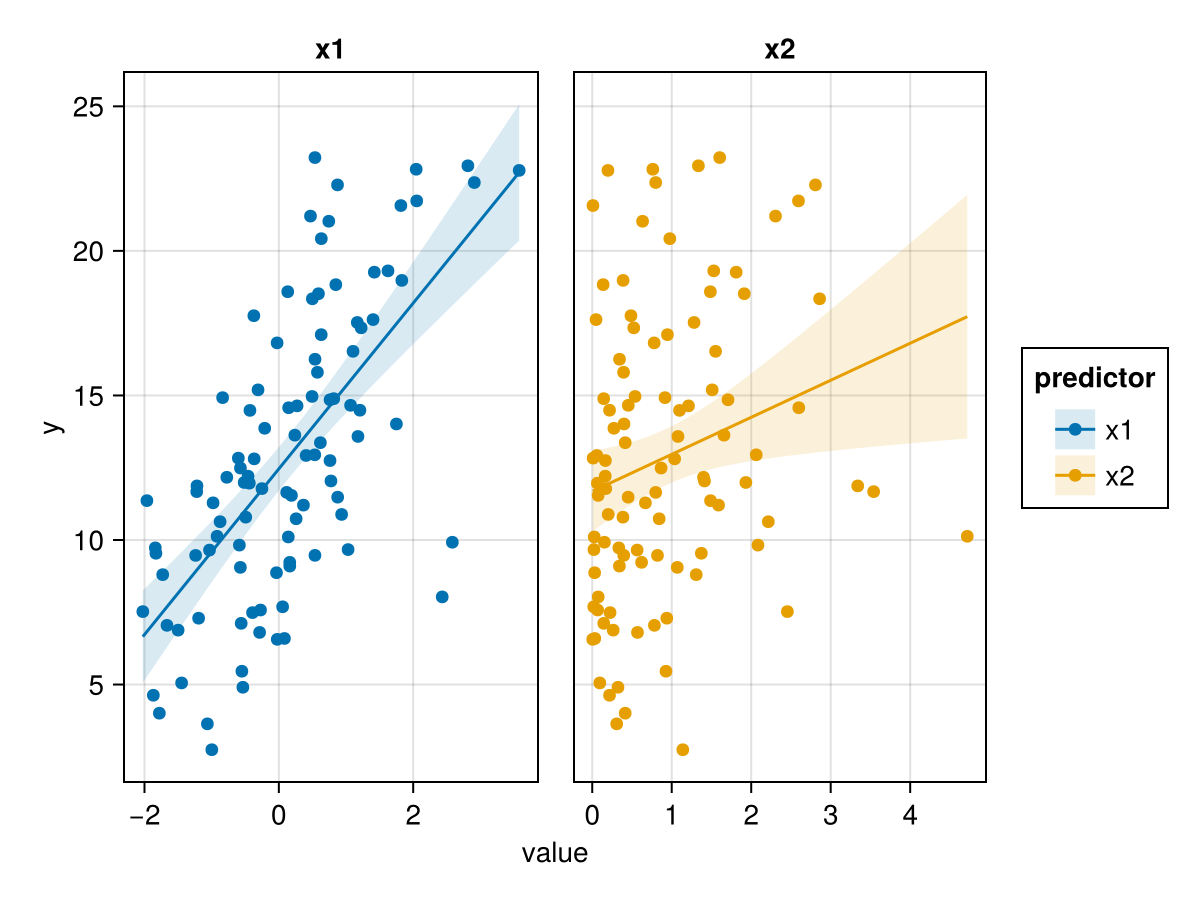

In [17]:
dfl = stack(df, [:x1, :x2], variable_name = :predictor)
layers = mapping() + linear()
g = data(dfl) * layers *  mapping(:value, :y, col = :predictor, color = :predictor)
fig = draw(g, facet = (; linkxaxes = :none))

## Bernoulli model with dataframes

Define parameters.

In [18]:
n = 100
β₀ = 1
β₁ = 3

3

Simulate.

In [19]:
df = @chain begin
    DataFrame(x = rand(Normal(), n))
    transform!(:x => (x -> logistic.(β₀ .+ β₁ * x)) => :p)
    transform!(:p => (x -> rand.(Bernoulli.(x))) => :y)
end

Row,x,p,y
,Float64,Float64,Bool
1,0.550811,0.934161,true
2,-0.587493,0.318109,false
3,-1.12572,0.0849314,false
4,0.835562,0.970877,true
5,-0.398742,0.4511,false
6,-1.37642,0.0419159,false
7,0.781882,0.965962,true
8,1.12182,0.987451,true
9,0.352564,0.886723,true


Visualize.

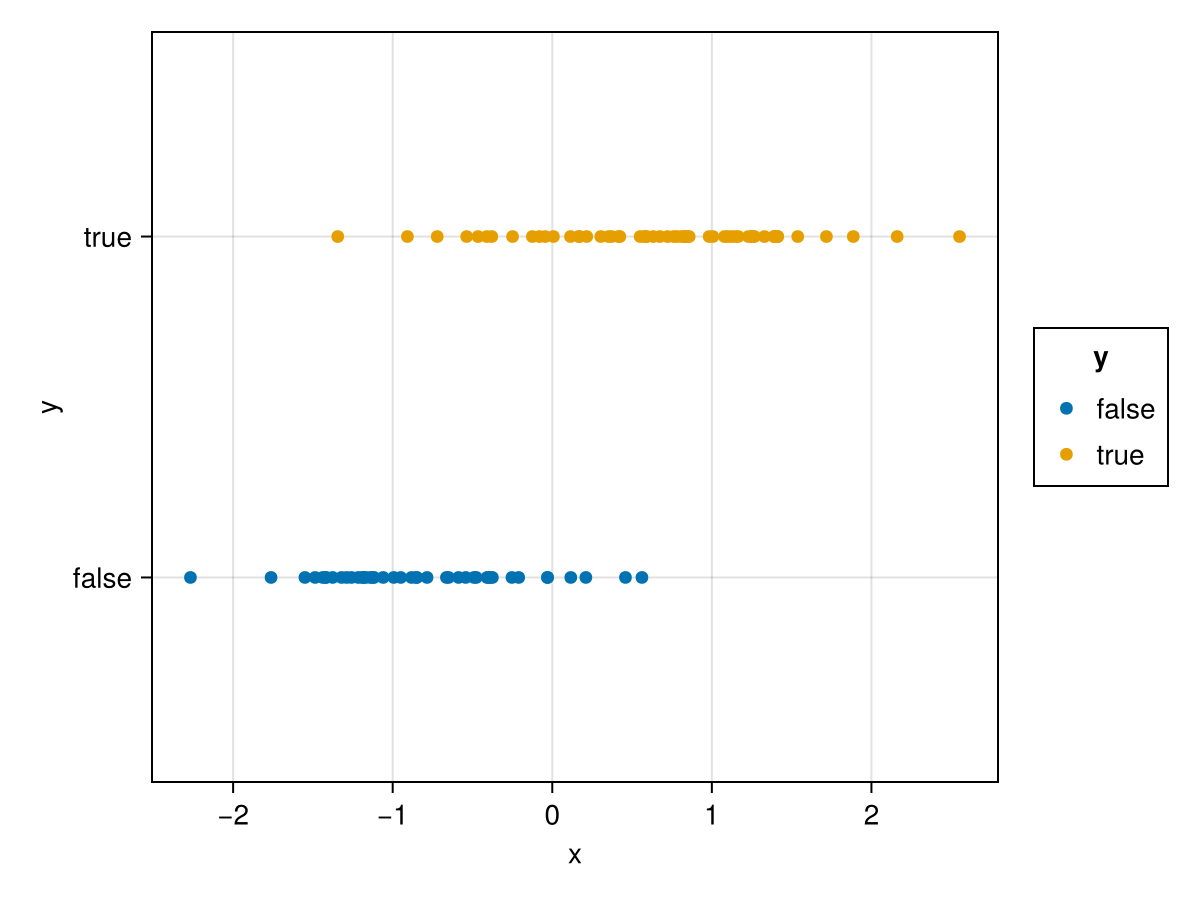

In [20]:
g = data(df) * mapping(:x, :y, color = :y)
fig = draw(g, facet = (; linkxaxes = :none))

## Poisson model with dataframes

Define parameters.

In [21]:
n = 100
β₀ = 0.1
β₁ = 0.5

0.5

Simulate.

In [22]:
df = @chain begin
    DataFrame(x = rand(Normal(), n))
    transform!(:x => (x -> exp.(0.1 .+ 0.5 * x)) => :λ)
    transform!(:λ => (x -> rand.(Poisson.(x))) => :y)
end

Row,x,λ,y
,Float64,Float64,Int64
1,0.157933,1.19598,1
2,-1.41556,0.544557,1
3,-2.01175,0.404188,0
4,-0.0717847,1.06621,0
5,-1.17875,0.613009,0
6,0.0840003,1.15258,2
7,-0.693823,0.78121,1
8,1.30133,2.11841,0
9,-0.485357,0.867033,3


Visualize.

In [23]:
g = data(df) * mapping(:x, :y, color = :y)
fig = draw(g, facet = (; linkxaxes = :none))

using CairoMakie
using AlgebraOfGraphics
using Random
using Distributions
using Chain
using DataFrames
using StatsFuns
using StatsBase

## Heterocedastic

Define parameters.

In [24]:
n = 300
β₀ = 3
β₁ = 3
α₀ = 0.6
α₁ = 0.4

0.4

Simulate.

In [25]:
df = @chain begin
    DataFrame(x = rand(Normal(), n))
    transform!(:x => (x -> β₀ .+ β₁ * x) => :μ)
    transform!(:x => (x -> exp.(α₀ .+ α₁ * x)) => :σ)
    transform!([:μ, :σ] => ((μ, σ) -> rand.(Normal.(μ, σ))) => :y)
end

Row,x,μ,σ,y
,Float64,Float64,Float64,Float64
1,-2.35493,-4.06479,0.710368,-3.52323
2,-0.831395,0.505815,1.30662,-1.23998
3,0.211535,3.6346,1.98301,2.67422
4,-0.291372,2.12589,1.62166,-0.595906
5,0.892962,5.67888,2.60435,8.00336
6,0.384698,4.15409,2.12523,3.83157
7,0.937714,5.81314,2.65139,9.37874
8,1.24193,6.7258,2.99449,7.48587
9,-1.40163,-1.20489,1.04013,-1.01557


Visualize.

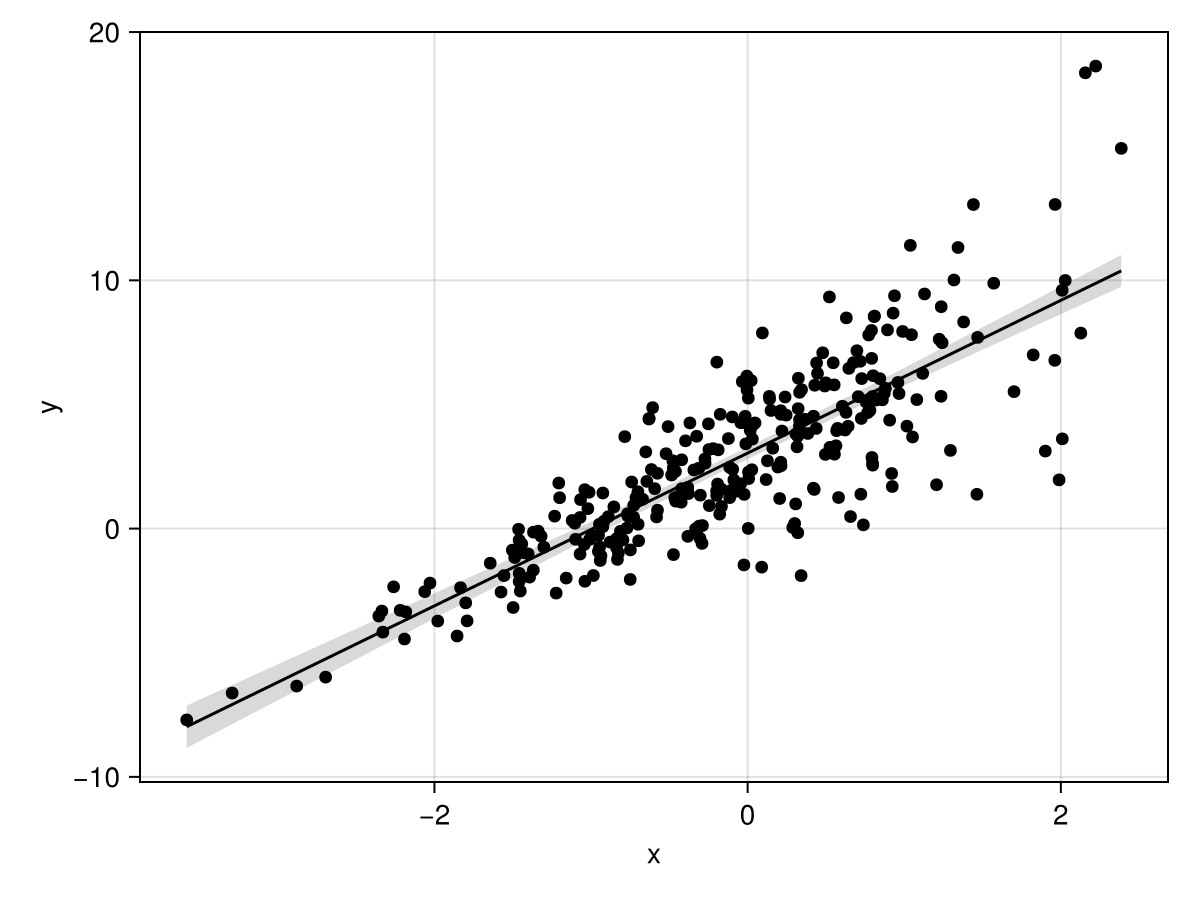

In [26]:
layers = mapping() + linear()
g = data(df) * layers *  mapping(:x, :y)
fig = draw(g)

## Mixed effects

Define parameters.

In [27]:
n = 100
β₀ = 2
β₁ = 0.8
σ = 0.2

0.2

Simulate.

In [28]:
df = @chain begin
    DataFrame(x = rand(Normal(), n))
    transform!(:x => (x -> exp.(β₀ .+ β₁ * x + rand.(Normal(0, σ), n))) => :λ)
    transform!(:λ => (x -> rand.(Poisson.(x))) => :y)
end

Row,x,λ,y
,Float64,Float64,Int64
1,1.32697,11.6918,15
2,-0.0554893,6.09654,7
3,0.257084,10.2159,7
4,0.812042,8.51322,6
5,-0.749368,4.7708,5
6,-0.288524,7.59239,7
7,0.633471,11.5285,8
8,0.253759,8.16215,6
9,-0.693632,4.6406,4


Visualize.

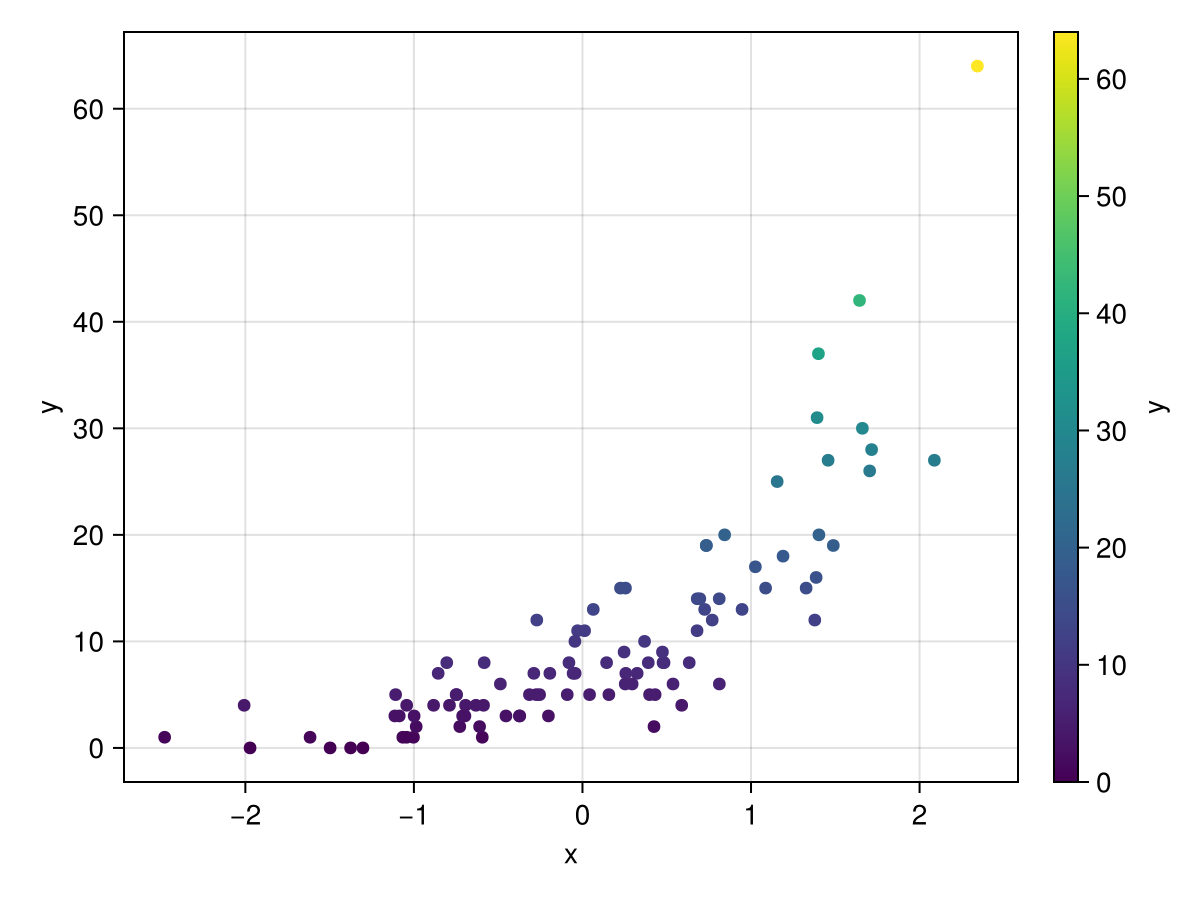

In [29]:
g = data(df) * mapping(:x, :y, color = :y)
fig = draw(g, facet = (; linkxaxes = :none))

## Mixture

In [30]:
n = 10000

10000

In [31]:
probs = [0.3, 0.4, 0.3]
β = [-1, 0.0, 1]
σ = 0.3

0.3

In [32]:
x = rand(Normal(0, 1), n)
rvs = [[Normal(β[1] * x[i], σ), Normal(β[2] * x[i], σ), Normal(β[3] * x[i], σ)] for i in 1:n]
Y = [MixtureModel(rvs[i], probs) for i in 1:n]
y = rand.(Y)

10000-element Vector{Float64}:
  0.15013403336410594
 -0.8868312211514958
  0.9417377707854647
  0.23828355281801364
 -0.02564453590128487
  0.35071117055247814
  1.43449280188307
 -0.6028838777462739
 -0.24124521899573215
 -0.4153311941667576
  ⋮
  0.3597362566398851
  0.24553500377596432
  0.010578319312487738
 -1.049337854752654
  0.37754487966136313
 -0.21329483717365463
 -0.4093234934152281
  0.17601835342027647
  0.20953521994899313

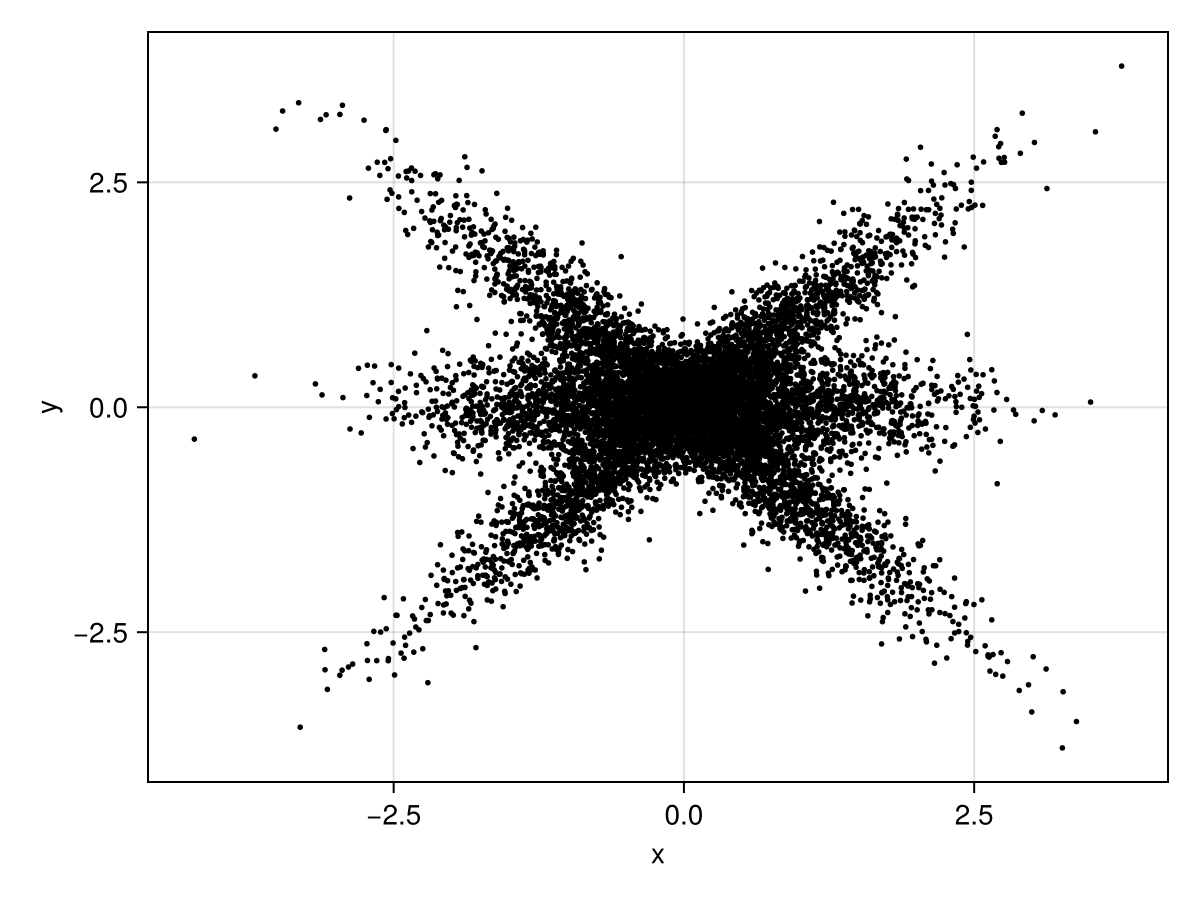

In [33]:
dfl = DataFrame(x = x, y = y)
g = data(dfl) * mapping(:x, :y) * visual(markersize = 4)
fig = draw(g)

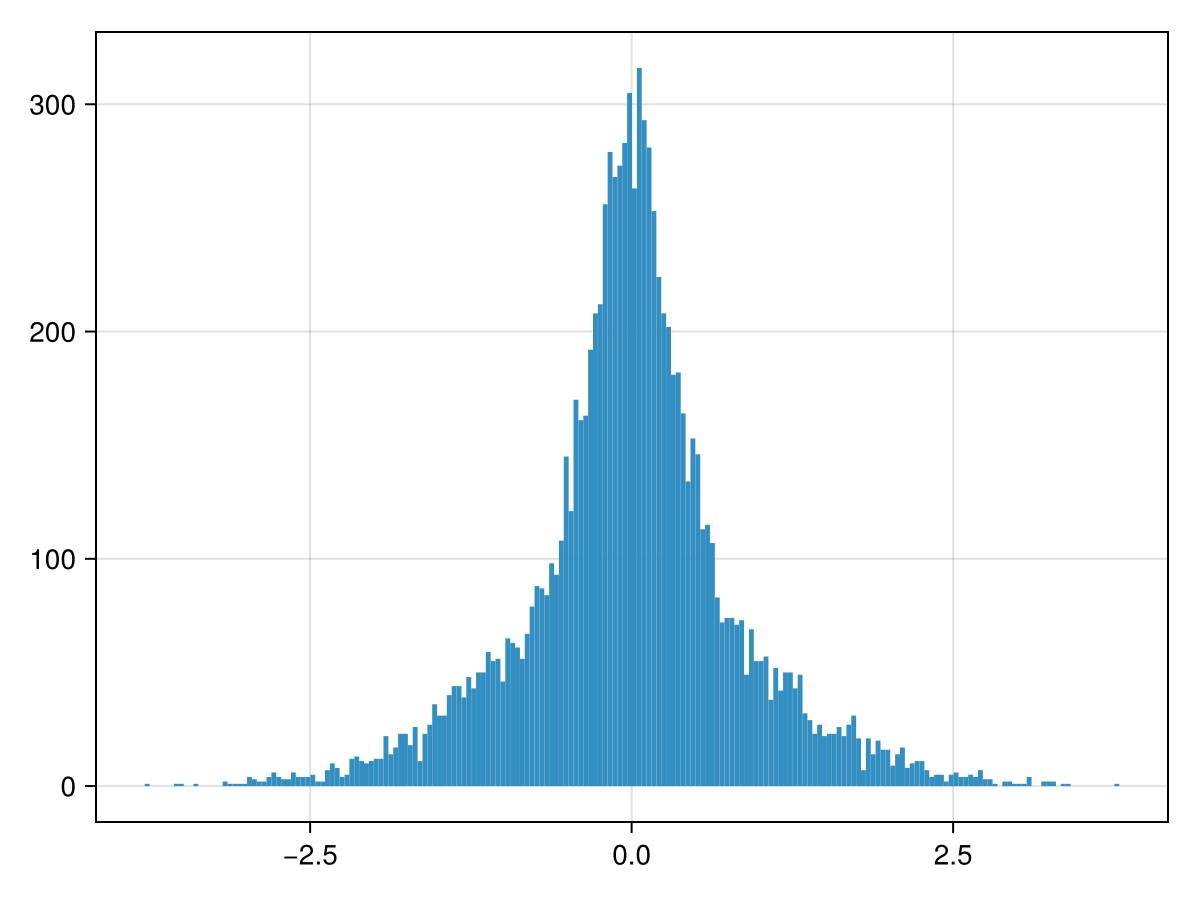

In [34]:
hist(y, bins = 200)

## Zero augmented

In [35]:
n = 1000
α = 0.4
β₀ = 2
β₁ = 0.8

0.8

Simulate.

In [36]:
generate_rv(μ) = [MixtureModel([Exponential(μ[i]), Normal(0, 0)], [α, 1-α]) for i in 1:length(μ)]
df = @chain begin
    DataFrame(x = rand(Normal(), n))
    transform!(:x => (x -> exp.(β₀ .+ β₁ * x)) => :μ)
    transform!(:μ => (x -> rand.(generate_rv(x))) => :y)
end

Row,x,μ,y
,Float64,Float64,Float64
1,-1.16719,2.90445,0.0
2,-0.240955,6.09358,0.0
3,-0.205331,6.26974,0.0
4,-1.96397,1.53545,1.25854
5,-0.462175,5.1052,1.7684
6,0.156371,8.37371,8.47879
7,-0.891816,3.62026,0.672171
8,0.972412,16.0857,0.0
9,0.194293,8.63164,0.0


Visualize.

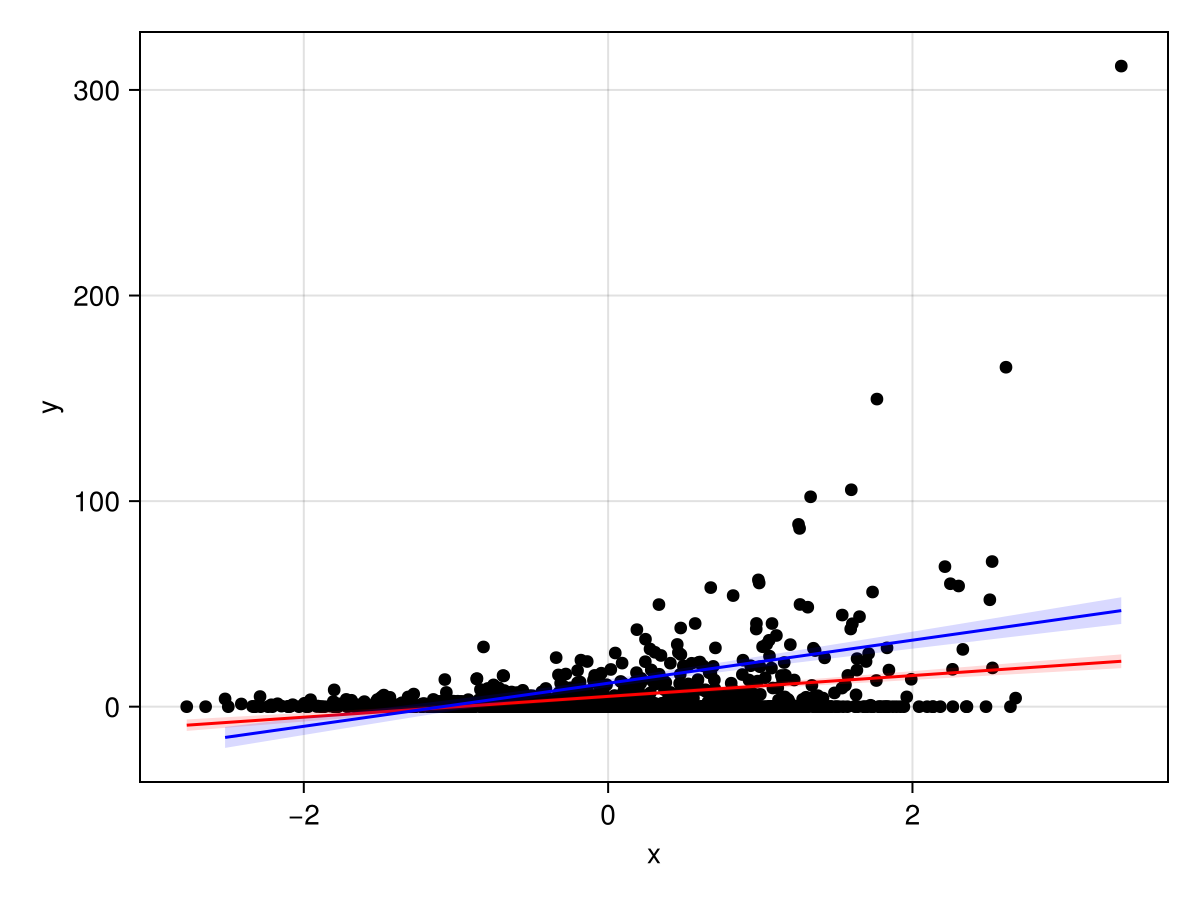

In [37]:
df2 = filter(:y => (y -> y > 0), df)
layers = mapping() + linear() * visual(color = :red)
g = data(df) * layers *  mapping(:x, :y) +
 data(df2) * mapping(:x, :y) * linear() * visual(color = :blue)
fig = draw(g)

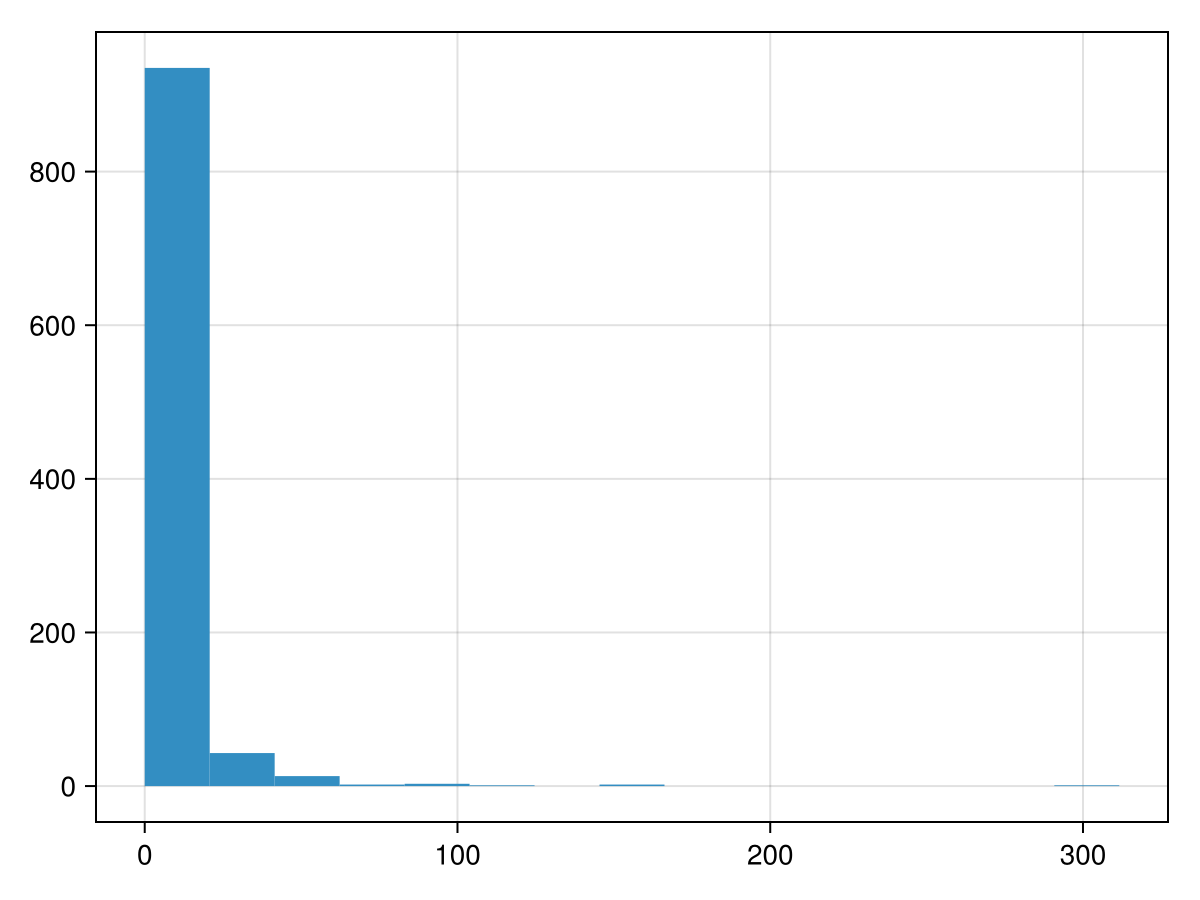

In [38]:
hist(df.y)

---

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*